(50000, 28, 28) (50000,)


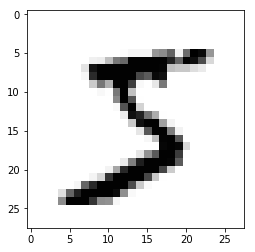

In [28]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [29]:
# import libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Training size X_t is set to be (784, 50000): 
Training size y_t is set to be (10, 50000): 
Validation size X_v is set to be (784, 10000): 
Validation size y_v is set to be (10, 10000): 
Test size X_t is set to be (784, 10000): 
Test size y_t is set to be (10, 10000): 
Ground Truth one hot vector is  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


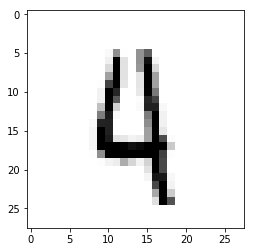

In [30]:
# data preprocessing

train_size = X_train.shape[0]
validation_size = X_val.shape[0]
test_size = X_test.shape[0]

X_t = np.transpose(X_train.reshape((train_size, 28 * 28)))
y_t = np.zeros((train_size, 10))
y_t[np.arange(int(train_size)), y_train] = 1
y_t = np.transpose(y_t)

print("Training size X_t is set to be %s: " % str(X_t.shape))
print("Training size y_t is set to be %s: " % str(y_t.shape))

X_v = np.transpose(X_val.reshape((validation_size, 28 * 28)))
y_v = np.zeros((validation_size, 10))
y_v[np.arange(int(validation_size)), y_val] = 1
y_v = np.transpose(y_v)
print("Validation size X_v is set to be %s: " % str(X_v.shape))
print("Validation size y_v is set to be %s: " % str(y_v.shape))

X_te = np.transpose(X_test.reshape((test_size, 28 * 28)))
y_te = np.zeros((validation_size, 10))
y_te[np.arange(int(validation_size)), y_test] = 1
y_te = np.transpose(y_te)

print("Test size X_t is set to be %s: " % str(X_te.shape))
print("Test size y_t is set to be %s: " % str(y_te.shape))


In [93]:
# define placeholders

X = tf.placeholder(shape = (784, None), dtype = tf.float32)
y = tf.placeholder(shape = (10, None), dtype = tf.float32)


In [78]:
# define variables using xavier initializer

initializer = tf.contrib.layers.xavier_initializer()
W1 = tf.Variable(initializer((300,784)))
b1 = tf.Variable(1, dtype = tf.float32)

W2 = tf.Variable(initializer((10,300)))
b2 = tf.Variable(1, dtype = tf.float32)

In [79]:
# forward propagation
def forward_propagation(X):
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.sigmoid(Z1)
    
    Z2 = tf.add(tf.matmul(W2, A1), b2)   
    y_hat = tf.nn.softmax(Z2, dim = 0)
    return y_hat

In [80]:
# define cost
def calculate_cost(X, y):
    y_hat = forward_propagation(X)
    eplison = 1e-10
    cost = - (tf.reduce_mean(tf.add(tf.multiply(y, tf.log(y_hat + eplison)) ,\
                                    tf.multiply(1 - y, tf.log(1 - y_hat + eplison)))))
    return cost


In [81]:
def predict_accuracy(X, y):
    y_hat = forward_propagation(X)
    match = tf.equal(tf.argmax(y), tf.argmax(y_hat))
    percentage = tf.reduce_mean(tf.cast(match, tf.float32))
    return percentage

In [88]:
# define optimizer
learning_rate = 0.0025
cost = calculate_cost(X, y)
pred = predict_accuracy(X, y)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [89]:
# define initializer
init = tf.global_variables_initializer()
iteration = 50
batch_size = 500
costs = []
indices = []

The cost of the training set of the iteration 0 is 0.0557882
The prediction accuracy on test data is 0.9126: 
The cost of the training set of the iteration 1 is 0.0437297
The prediction accuracy on test data is 0.9271: 
The cost of the training set of the iteration 2 is 0.0369868
The prediction accuracy on test data is 0.9365: 
The cost of the training set of the iteration 3 is 0.0320154
The prediction accuracy on test data is 0.9432: 
The cost of the training set of the iteration 4 is 0.0280786
The prediction accuracy on test data is 0.95: 
The cost of the training set of the iteration 5 is 0.0248219
The prediction accuracy on test data is 0.9539: 
The cost of the training set of the iteration 6 is 0.0220565
The prediction accuracy on test data is 0.9574: 
The cost of the training set of the iteration 7 is 0.0196862
The prediction accuracy on test data is 0.9604: 
The cost of the training set of the iteration 8 is 0.0176363
The prediction accuracy on test data is 0.9629: 
The cost of 

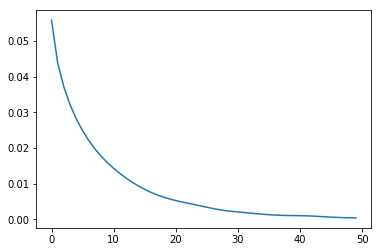

In [92]:
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(len(X_train) / batch_size) 
    for i in range(iteration):
        for j in range(0, len(X_train), batch_size):
            batch_x = X_t[:,j:j + batch_size]
            batch_y = y_t[:,j:j + batch_size]
            sess.run(optimizer, feed_dict={X: batch_x,y: batch_y})            
        cost_i = sess.run(cost, feed_dict={X: X_t,y: y_t})
        costs.append(cost_i)
        indices.append(i)
        pred_i = sess.run(pred, feed_dict={X: X_te,y: y_te})
        print("The cost of the training set of the iteration %i is %s" % (i, str(cost_i)))
        print("The prediction accuracy on test data is %s: "% (str(pred_i)))
    plt.plot(indices, costs)